In [1]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load local datasets
sys.path.insert(0, str(Path().cwd().parent))
from my_datasets.preprocess import load_bank

In [4]:
RANDOM_STATE = 123

# Decistion Tree

In [5]:
X, y =load_bank(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4000)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41211, 35), (4000, 35), (41211,), (4000,))

In [8]:
folds = KFold(n_splits=5)

5

In [14]:


tree_depth4 = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=RANDOM_STATE,
)

tree_depth4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=123)

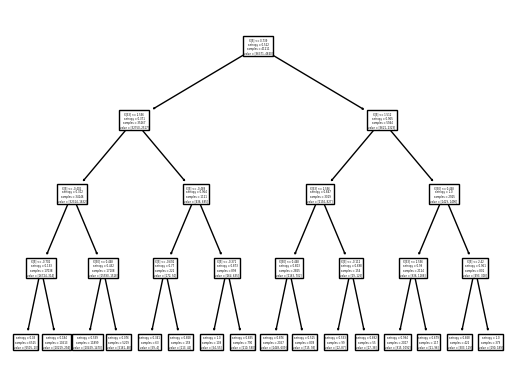

In [17]:
plot_tree(tree_depth4)

# Save
plt.savefig('tree_depth4', dpi=300)

plt.show()

In [25]:
predicted_probs = tree_depth4.predict_proba(X_test[:16])
actual = y_test[:16]

pd.DataFrame({
    'prob class 0': predicted_probs[:, 0],
    'prob class 1': predicted_probs[:, 1],
    'actual class': actual,
})


,prob class 0,prob class 1,actual class
33927,0.876460,0.123540,True
37971,0.996935,0.003065,False
34319,0.996935,0.003065,False
2814,0.972035,0.027965,False
42614,0.972035,0.027965,False
15872,0.972035,0.027965,False
23295,0.996935,0.003065,False
3570,0.990785,0.009215,False
39662,0.265823,0.734177,True
13323,0.703938,0.296062,False


In [26]:
predicted_probs = tree_depth4.predict_proba(X_test[:16])
predicts = tree_depth4.predict(X_test[:16])
actual = y_test[:16]

pd.DataFrame({
    'prob class 0': predicted_probs[:, 0],
    'prob class 1': predicted_probs[:, 1],
    'predicted class': predicts,
    'actual class': actual,
})


,prob class 0,prob class 1,predicted class,actual class
33927,0.876460,0.123540,False,True
37971,0.996935,0.003065,False,False
34319,0.996935,0.003065,False,False
2814,0.972035,0.027965,False,False
42614,0.972035,0.027965,False,False
15872,0.972035,0.027965,False,False
23295,0.996935,0.003065,False,False
3570,0.990785,0.009215,False,False
39662,0.265823,0.734177,True,True
13323,0.703938,0.296062,False,False


In [41]:
y_pred = tree_depth4.predict(X_test)
accuracy_score(y_test, y_pred)

0.89825

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      3551
        True       0.57      0.36      0.44       449

    accuracy                           0.90      4000
   macro avg       0.75      0.66      0.69      4000
weighted avg       0.88      0.90      0.89      4000



In [45]:
tree_depth4.feature_importances_

array([0.        , 0.        , 0.        , 0.00087103, 0.        ,
       0.60030399, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11012472, 0.        , 0.        , 0.28870026, 0.        ])